In [140]:
import pandas as pd
import numpy as np
from pandas import json_normalize
import requests 
import json
import os
from dotenv import load_dotenv
import time
import sys
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("../")

In [141]:
#url = "https://api.spacexdata.com/v4/starlink"
#url = "https://api.wheretheiss.at/v1/satellites/25544" 
url = "http://api.open-notify.org/iss-now.json"
url2 = "https://satellitemap.space/json/sl.json?0.2592483420529641+v1007+19253"

In [142]:
req = requests.get(url)
req.content

b'{"message": "success", "timestamp": 1682952112, "iss_position": {"longitude": "-45.6764", "latitude": "-17.7757"}}'

In [143]:
req2 = requests.get(url2)
req2.content #1682930043

b'{"stamp":1682952004,"sats":[{"id":25544,"name":"0-A","oname":"ISS","lat":-12.4774,"lng":-49.8965,"alt":420.7,"alt2":424.1,"p":414,"lat2":-27.0634,"lng2":-37.4857,"illum":1,"raan":200.7111,"age":0.2},{"id":44713,"name":"2-A","oname":"STARLINK 1007","lat":-36.7898,"lng":75.8829,"alt":560.1,"alt2":554.7,"p":546.4,"lat2":-23.2815,"lng2":89.8507,"illum":0,"raan":194.1989,"age":1.1},{"id":44714,"name":"2-B","oname":"STARLINK 1008","lat":47.2981,"lng":164.0476,"alt":551.2,"alt2":552.4,"p":546.5,"lat2":52.9590,"lng2":-169.0078,"illum":0,"raan":194.3001,"age":1.1},{"id":44715,"name":"2-C","oname":"STARLINK 1009","lat":40.0967,"lng":-109.1340,"alt":550,"alt2":547.9,"p":546.7,"lat2":27.1023,"lng2":-93.8765,"illum":1,"raan":193.7521,"age":1},{"id":44716,"name":"2-D","oname":"STARLINK 1010","lat":20.9162,"lng":126.5124,"alt":547.4,"alt2":549.2,"p":546.9,"lat2":34.7356,"lng2":139.8720,"illum":0,"raan":192.4803,"age":0.7},{"id":44717,"name":"2-E","oname":"STARLINK 1011","lat":28.4857,"lng":153.8407

In [109]:
req2.json()['sats'][1:]

[{'id': 44713,
  'name': '2-A',
  'oname': 'STARLINK 1007',
  'lat': 3.0644,
  'lng': -63.2595,
  'alt': 547.3,
  'alt2': 550.3,
  'p': 546.4,
  'lat2': -12.029,
  'lng2': -53.0624,
  'illum': 1,
  'raan': 194.1989,
  'age': 1},
 {'id': 44714,
  'name': '2-B',
  'oname': 'STARLINK 1008',
  'lat': -48.5021,
  'lng': 61.3151,
  'alt': 564.7,
  'alt2': 560.3,
  'p': 546.5,
  'lat2': -38.1691,
  'lng2': 81.7607,
  'illum': 1,
  'raan': 194.3001,
  'age': 1.1},
 {'id': 44715,
  'name': '2-C',
  'oname': 'STARLINK 1009',
  'lat': -7.4826,
  'lng': 113.4023,
  'alt': 549.6,
  'alt2': 547.4,
  'p': 546.7,
  'lat2': 7.64,
  'lng2': 123.5292,
  'illum': 0,
  'raan': 193.7521,
  'age': 0.9},
 {'id': 44716,
  'name': '2-D',
  'oname': 'STARLINK 1010',
  'lat': -49.1646,
  'lng': -1.02,
  'alt': 564.8,
  'alt2': 566.5,
  'p': 546.9,
  'lat2': -53.202,
  'lng2': 27.1265,
  'illum': 1,
  'raan': 192.4803,
  'age': 0.7},
 {'id': 44717,
  'name': '2-E',
  'oname': 'STARLINK 1011',
  'lat': -52.2442,
  

In [196]:
df_sl = pd.DataFrame(requests.get(url2).json()['sats'][1:])
df_sl = df_sl[df_sl['oname'] != 'noname']
df_sl = df_sl[['name', 'oname', 'lat', 'lng']]
df_sl

,name,oname,lat,lng
0,2-A,STARLINK 1007,7.7165,-90.6389
1,2-B,STARLINK 1008,-50.6814,29.2245
2,2-C,STARLINK 1009,-12.1058,85.9509
3,2-D,STARLINK 1010,-46.5810,-32.5868
4,2-E,STARLINK 1011,-50.7031,1.2360
...,...,...,...,...
3834,79-AZ,STARLINK-5758,40.0756,-65.2231
3835,79-BA,STARLINK-5793,24.2362,-100.2374
3836,79-BB,STARLINK-5795,40.3407,-64.1046
3837,79-BC,STARLINK-5798,40.4144,-63.7926


In [144]:
req.json()['iss_position']

{'longitude': '-45.6764', 'latitude': '-17.7757'}

In [170]:
speed_f9 = 6724
height_iss = 400000
earth_radius = 40008
speed_iss = 30000

distance = earth_radius + height_iss
relative_speed = speed_f9 + speed_iss

time_iss = distance / relative_speed

minutes, seconds = divmod(time_iss*60, 60)

print(f"The Falcon 9 and the ISS will cross in {int(minutes)} mins and {int(seconds)} segs.")

time_iss = (11*60)+58
iss_distance = speed_iss / time_iss
print(f'The ISS will travel {iss_distance:.10f}km in 11 min and 58 segs')

The Falcon 9 and the ISS will cross in 11 mins and 58 segs.
The ISS will travel 41.7827298050km in 11 min and 58 segs


In [171]:
speed_f9 = 6724
height_sl = 550000
earth_radius = 40008
speed_sl = 27000

distance = earth_radius + height_sl
relative_speed = speed_f9 + speed_sl

time_sl = distance / relative_speed

minutes, seconds = divmod(time_sl*60, 60)

print(f"The Falcon 9 and the SL will cross in {int(minutes)} mins and {int(seconds)} segs.")

time_sl = (17*60)+29
sl_distance = speed_sl / time_sl
print(f'The StarLink will travel {iss_distance:.10f}km in 17 min and 29 segs')

The Falcon 9 and the SL will cross in 17 mins and 29 segs.
The StarLink will travel 41.7827298050km in 17 min and 29 segs


In [198]:
position_iss = []
position_sl = []
location_iss = requests.get(url).json()
location_sl = requests.get(url2).json()['sats'][1:]

for i in range(5):
    
    if location_iss['message'] == 'success':
        time.sleep(2)
        print(i)

        position_iss.append(location_iss['iss_position'])
    if 'id' in location_sl:
        time.sleep(2)
        print(i)
        position_sl.append(location_sl)
        
    else:
        break
        

for i in iss_location:
    
    if i['latitude']==28.4556:
        print(f'ISS Not Clear')
        
    if i['longitude']==-80.5278:
        print(f'ISS Not Clear')
        
    if i['latitude']==28.8960:
        print(f'ISS Not Clear')
        
    if i['longitude']==-81.1184:
        print(f'ISS Not Clear')
        
    else:
        print(f'ISS Clear')
        break
        
for i in location_sl:
    
    if i['lat']==28.4556:
        print(f'SL Not Clear')
        
    if i['lng']==-80.5278:
        print(f'SL Not Clear')
        
    if i['lat']==28.8960:
        print(f'SL Not Clear')
        
    if i['lng']==-81.1184:
        print(f'SL Not Clear')
        
    else:
        print(f'SL Clear')
        break

df_iss = pd.DataFrame(position_iss)
df_sl, df_iss

0
ISS Clear
SL Clear


(       name          oname      lat       lng
 0       2-A  STARLINK 1007   7.7165  -90.6389
 1       2-B  STARLINK 1008 -50.6814   29.2245
 2       2-C  STARLINK 1009 -12.1058   85.9509
 3       2-D  STARLINK 1010 -46.5810  -32.5868
 4       2-E  STARLINK 1011 -50.7031    1.2360
 ...     ...            ...      ...       ...
 3834  79-AZ  STARLINK-5758  40.0756  -65.2231
 3835  79-BA  STARLINK-5793  24.2362 -100.2374
 3836  79-BB  STARLINK-5795  40.3407  -64.1046
 3837  79-BC  STARLINK-5798  40.4144  -63.7926
 3838  79-BD  STARLINK-5800  40.5800  -63.0472
 
 [3839 rows x 4 columns],
   longitude latitude
 0  163.1754  47.0754)

In [153]:
df = pd.read_csv("Falcon_9_and_Falcon_Heavy_launches.csv")
df.columns
df = df[['Date', 'Time', 'Version, Booster', 'Launch_Site', 'Payload', 
        'Payload_Mass', 'Orbit', 'Customer', 'Launch_Outcome', 'Booster_landing']]
df

,Date,Time,"Version, Booster",Launch_Site,Payload,Payload_Mass,Orbit,Customer,Launch_Outcome,Booster_landing
0,4 June 2010,18:45,F9 v1.0 B0003,CCAFS SLC-40,Dragon Spacecraft Qualification Unit,No payload (excl. Dragon Mass),LEO,SpaceX,Success,Failure
1,8 December 2010,15:43,F9 v1.0 B0004,CCAFS SLC-40,Dragon demo flight C1,Classified (excl. Dragon Mass),LEO (ISS),NASA (COTS) NRO,Success,Failure
2,22 May 2012,07:44,F9 v1.0 B0005,CCAFS SLC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt
3,8 October 2012,00:35,F9 v1.0 B0006,CCAFS SLC-40,SpaceX CRS-1,"4,700",LEO (ISS),NASA (CRS),Success,No attempt
4,8 October 2012,00:35,F9 v1.0 B0006,CCAFS SLC-40,Orbcomm-OG2,172,LEO,Orbcomm,Partial failure,No attempt
...,...,...,...,...,...,...,...,...,...,...
160,19 June 2022,04:27,F9 B5 B1061.9,CCSFS SLC-40,Globalstar-2 M087 (FM15),700,LEO,GlobalstarUnknown US Government Agency,Success,Success(drone ship)
161,29 June 2022,21:04,F9 B5 B1073.2,CCSFS SLC-40,SES-22,"3,500",GTO,SES,Success,Success(drone ship)
162,7 July 2022,13:11,F9 B5 B1058.13,CCSFS SLC-40,Starlink Group 4-21 (53 satellites),"16,250",LEO,SpaceX,Success,Success(drone ship)
163,11 July 2022,01:39,F9 B5 B1063.6,VSFB SLC-4E,Starlink Group 3-1 (46 satellites),"13,570",SSO,SpaceX,Success,Success(drone ship)


In [154]:
f9_filter = df['Version, Booster'].str.contains('F9 B5')
df_f9b5 = df[f9_filter]
df_f9b5

,Date,Time,"Version, Booster",Launch_Site,Payload,Payload_Mass,Orbit,Customer,Launch_Outcome,Booster_landing
54,11 May 2018,20:14,F9 B5 B1046.1,KSC LC-39A,Bangabandhu-1,"3,600",GTO,Thales-Alenia / BTRC,Success,Success
58,22 July 2018,05:50,F9 B5 B1047.1,CCAFS SLC-40,Telstar 19V,"7,075",GTO,Telesat,Success,Success
59,25 July 2018,11:39,F9 B5 B1047.1,VAFB SLC-4E,Iridium NEXT-7,"9,600",Polar LEO,Iridium Communications,Success,Success
60,7 August 2018,05:18,F9 B5 B1046.2,CCAFS SLC-40,Merah Putih,"5,800",GTO,Telkom Indonesia,Success,Success
61,10 September 2018,04:45,F9 B5 B1049.1,CCAFS SLC-40,Telstar 18V / Apstar-5C,"7,060",GTO,Telesat,Success,Success
...,...,...,...,...,...,...,...,...,...,...
160,19 June 2022,04:27,F9 B5 B1061.9,CCSFS SLC-40,Globalstar-2 M087 (FM15),700,LEO,GlobalstarUnknown US Government Agency,Success,Success(drone ship)
161,29 June 2022,21:04,F9 B5 B1073.2,CCSFS SLC-40,SES-22,"3,500",GTO,SES,Success,Success(drone ship)
162,7 July 2022,13:11,F9 B5 B1058.13,CCSFS SLC-40,Starlink Group 4-21 (53 satellites),"16,250",LEO,SpaceX,Success,Success(drone ship)
163,11 July 2022,01:39,F9 B5 B1063.6,VSFB SLC-4E,Starlink Group 3-1 (46 satellites),"13,570",SSO,SpaceX,Success,Success(drone ship)


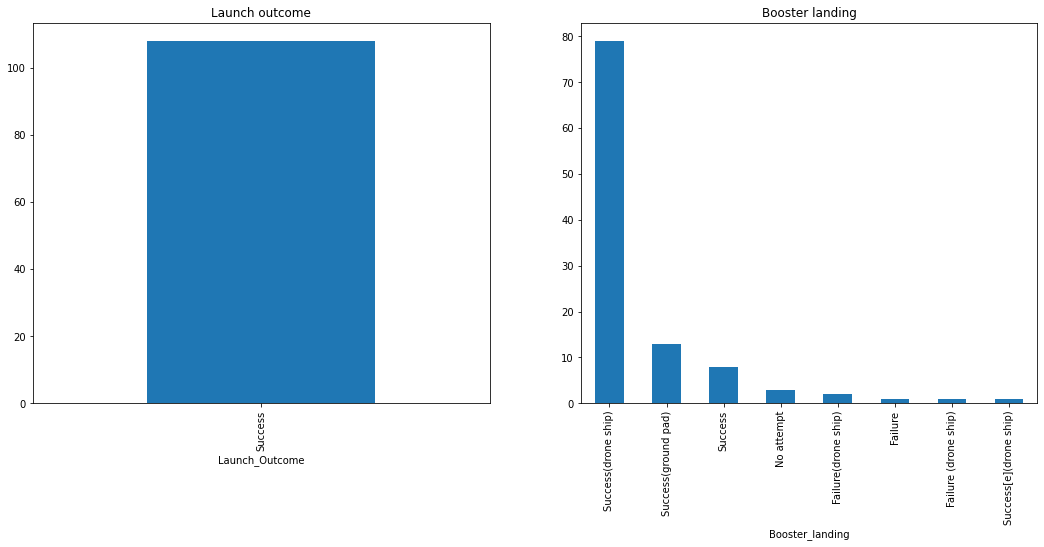

In [155]:
fig, axs = plt.subplots(ncols=2, figsize=(18,7))
df_f9b5['Booster_landing'].value_counts().plot(kind="bar", ax=axs[1])
axs[1].set_title("Booster landing")
df_f9b5['Launch_Outcome'].value_counts().plot(kind="bar", ax=axs[0])
axs[0].set_title("Launch outcome")
plt.show()

In [156]:
df_f9b5['Orbit'].mode()

0    LEO
Name: Orbit, dtype: object

<Axes: xlabel='Orbit'>

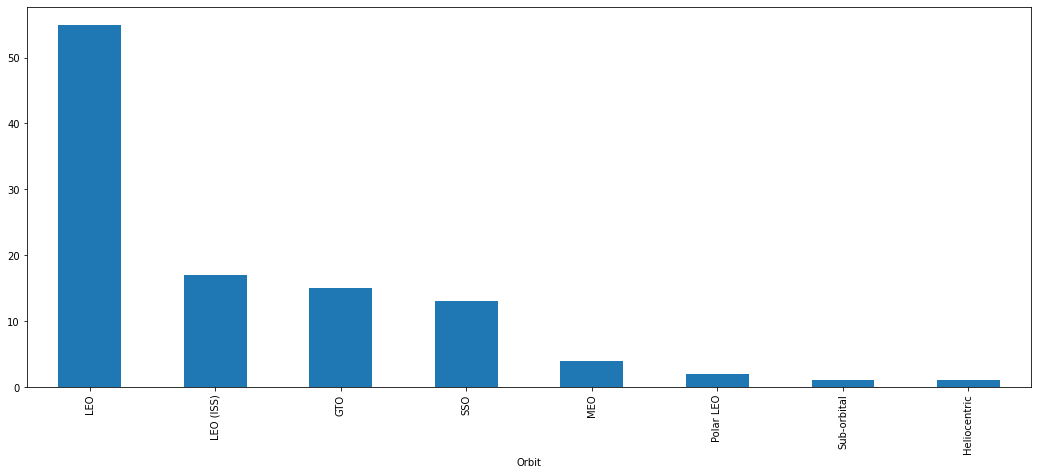

In [157]:
df_f9b5['Orbit'].value_counts().plot(kind="bar", figsize=(18,7))

In [158]:
df_f9b5['Customer'].mode()

0    SpaceX
Name: Customer, dtype: object

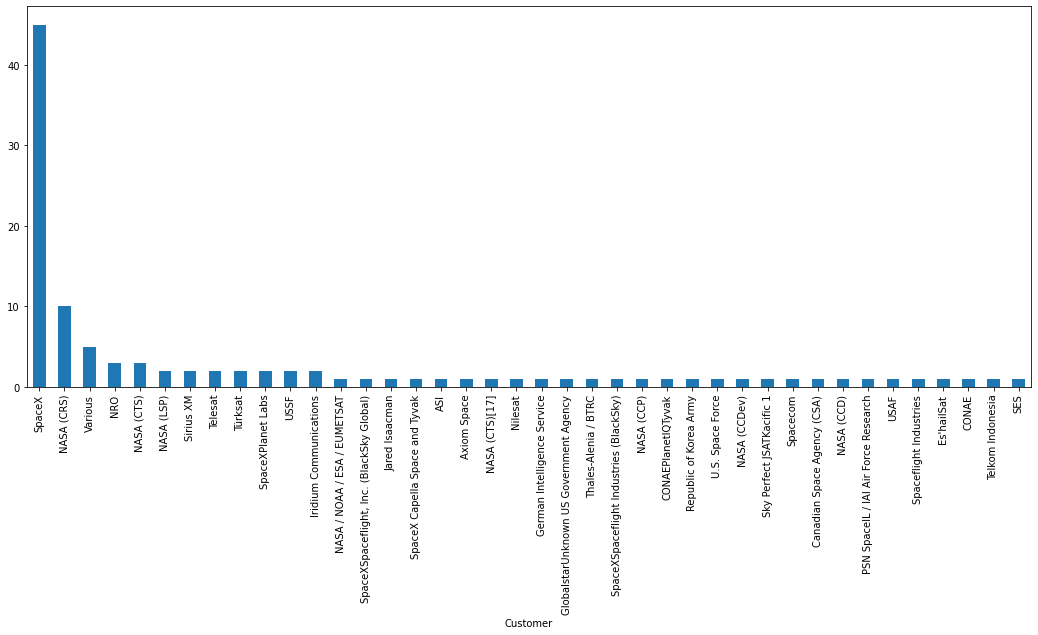

In [160]:
df_f9b5['Customer'].value_counts().plot(kind="bar", figsize=(18,7));

In [162]:
df_f9b5['Launch_Site'].unique()

array(['KSC LC-39A', 'CCAFS SLC-40', 'VAFB SLC-4E', 'CCAF LC-40',
       'CCSFS SLC-40', 'VSFB SLC-4E', 'VSFBSLC-4E'], dtype=object)

In [167]:
#sns.histplot(y=df_f9b5.Launch_Site, x=df_f9b5.Booster_landing, palette="magma")


In [ ]:
nasa_filter = df['Customer'].str.contains('NASA')
df_f9b5_nasa = df_f9b5[nasa_filter]
df_f9b5_nasa

In [ ]:
#df_f9b5_nasa['Booster_landing'].value_counts().plot(kind="bar")
#df_f9b5_nasa['Launch_Outcome'].value_counts().plot(kind="bar")

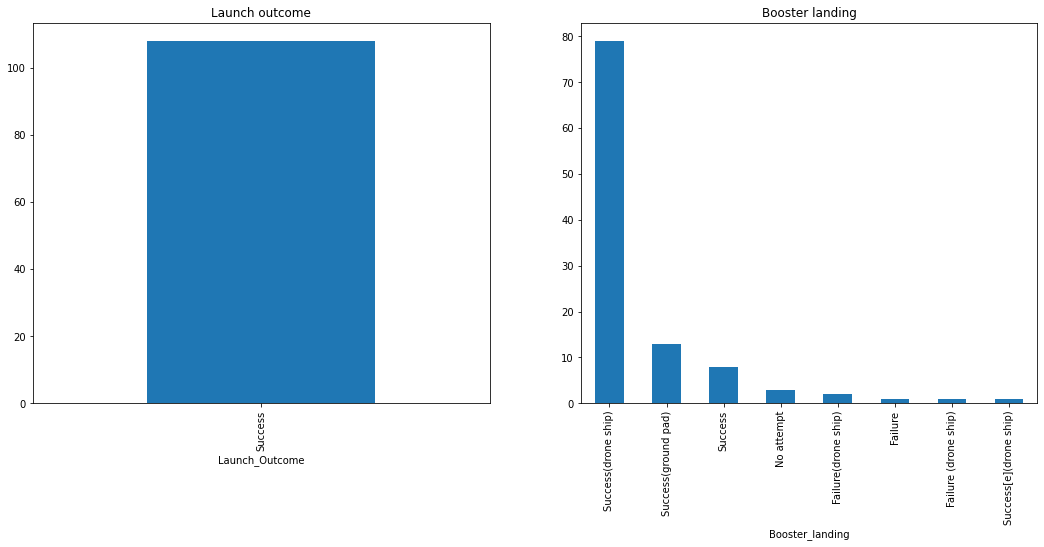

In [165]:
fig, axs = plt.subplots(ncols=2, figsize=(18,7))
df_f9b5['Booster_landing'].value_counts().plot(kind="bar", ax=axs[1])
axs[1].set_title("Booster landing")
df_f9b5['Launch_Outcome'].value_counts().plot(kind="bar", ax=axs[0])
axs[0].set_title("Launch outcome")

plt.show()

In [168]:
df_f9b5['Booster_landing'].value_counts()

Booster_landing
Success(drone ship)       79
Success(ground pad)       13
Success                    8
No attempt                 3
Failure(drone ship)        2
Failure                    1
Failure (drone ship)       1
Success[e](drone ship)     1
Name: count, dtype: int64